In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Import libraries

from sqlalchemy import create_engine
import pyodbc
server = 'DESKTOP-DBOU3LA'         
database = 'BIKESTOREDB'
connection_string = (
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
)
print(connection_string)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={connection_string}")

print("Connection ready!")


DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-DBOU3LA;DATABASE=BIKESTOREDB;Trusted_Connection=yes;
Connection ready!


In [2]:
#april vs may sales comparison
query_sales_cmp= """ select year(order_date) as year, month(order_date) as month, count(distinct o.order_id)as order_count,count(distinct o.customer_id) as unique_customers,
round(avg(oi.discount)*100,2) as avg_discount_percentage,
round(sum(oi.quantity),2) as total_units_sold,
round(sum(oi.quantity * oi.list_price * (1- oi.discount)),2) as total_revenue
,round(avg(oi.list_price),2) as avg_selling_price
from orders o
join order_items oi on o.order_id = oi.order_id
where month(order_date) in (4,5) 
group by year(order_date), month(order_date)
order by year, month;"""
df_sales_cmp = pd.read_sql(query_sales_cmp, engine)
print(df_sales_cmp)

   year  month  order_count  unique_customers  avg_discount_percentage  \
0  2016      4           43                42                    10.55   
1  2016      5           51                51                    10.08   
2  2017      4           57                57                    11.81   
3  2017      5           57                57                    10.60   
4  2018      4          125               125                    10.34   

   total_units_sold  total_revenue  avg_selling_price  
0               176      167144.05            1028.39  
1               224      205270.01            1035.86  
2               248      227290.91            1065.69  
3               241      268233.24            1230.62  
4               580      817921.86            1551.64  


C:\Users\Hp\AppData\Local\Temp\ipykernel_13232\1181829914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_revenue', data=df_sales_cmp, palette='Blues_d')


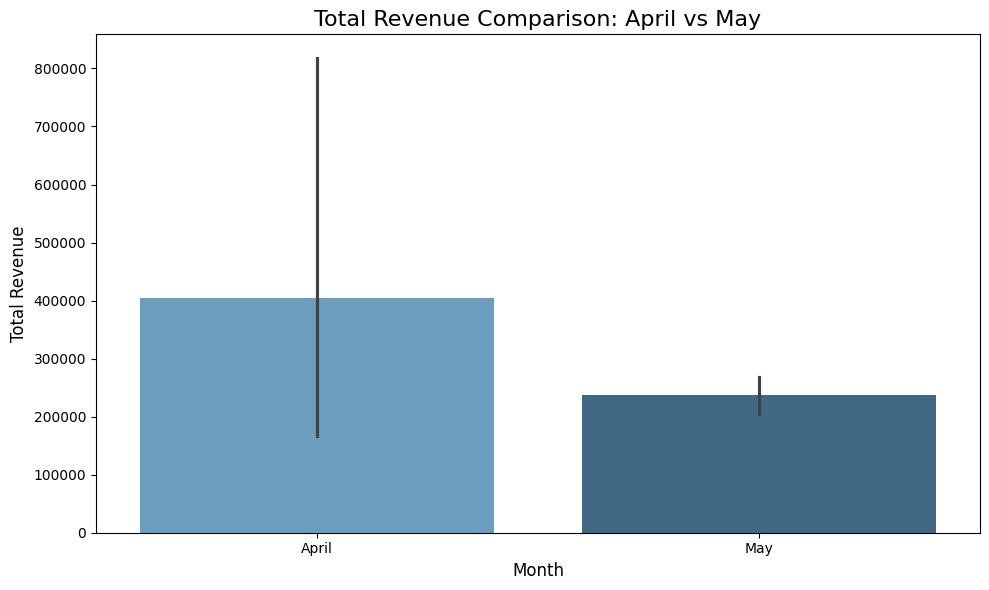

In [3]:
#bar plot for april vs may sales comparison
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='total_revenue', data=df_sales_cmp, palette='Blues_d')
plt.title('Total Revenue Comparison: April vs May', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(ticks=[0,1], labels=['April', 'May'])
plt.tight_layout()
plt.show()

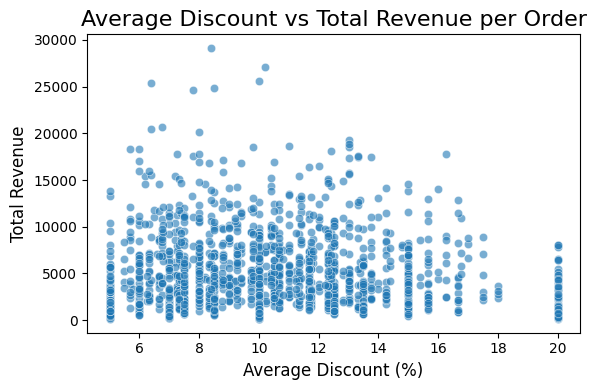

In [7]:
#discount vs revenue scatter plot
query_discount_revenue = """ select o.order_id,round(avg(oi.discount)*100,2) as avg_discount_percentage,round(sum(oi.quantity * oi.list_price * (1- oi.discount)),2) as total
from orders o
join order_items oi on o.order_id = oi.order_id
group by o.order_id;"""
df_discount_revenue = pd.read_sql(query_discount_revenue, engine)
plt.figure(figsize=(6,4))
sns.scatterplot(x='avg_discount_percentage', y='total', data=df_discount_revenue, alpha=0.6)
plt.title('Average Discount vs Total Revenue per Order', fontsize=16)
plt.xlabel('Average Discount (%)', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.tight_layout()
plt.show()

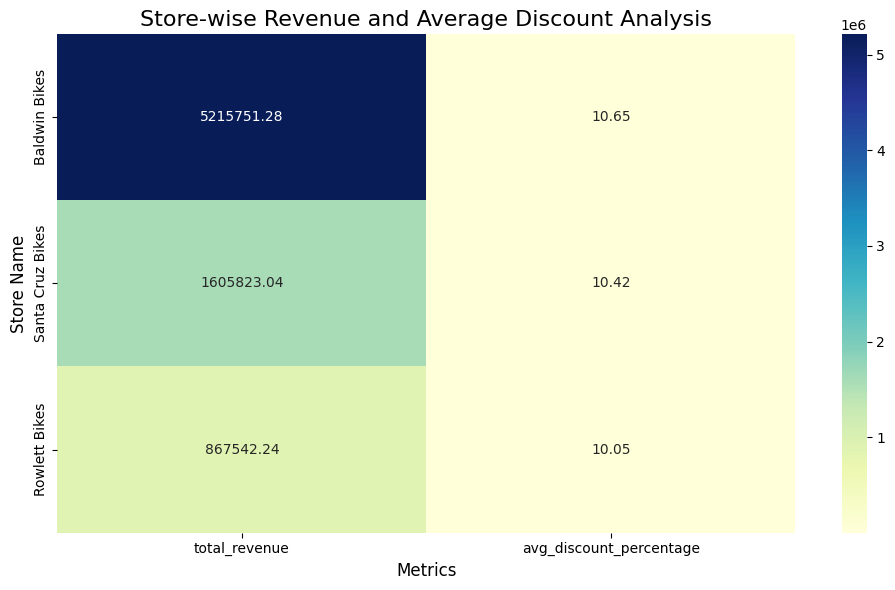

In [5]:
#store-wise revenue and discount analysis heatmap
query_store_analysis = """ select s.store_name,round(sum(oi.quantity * oi.list_price * (1- oi.discount)),2) as total_revenue,round(avg(oi.discount)*100,2) as avg_discount_percentage
from orders o
join order_items oi on o.order_id = oi.order_id
join stores s on o.store_id = s.store_id
group by s.store_name
order by total_revenue desc;"""
df_store_analysis = pd.read_sql(query_store_analysis, engine)
plt.figure(figsize=(10,6))
sns.heatmap(df_store_analysis.set_index('store_name')[['total_revenue', 'avg_discount_percentage']], annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Store-wise Revenue and Average Discount Analysis', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Store Name', fontsize=12)
plt.tight_layout()
plt.show()
